C:\Users\Admin\AppData\Local\Temp\ipykernel_2588\1557733983.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.age.fillna(X.age.mean(), inplace=True)
c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


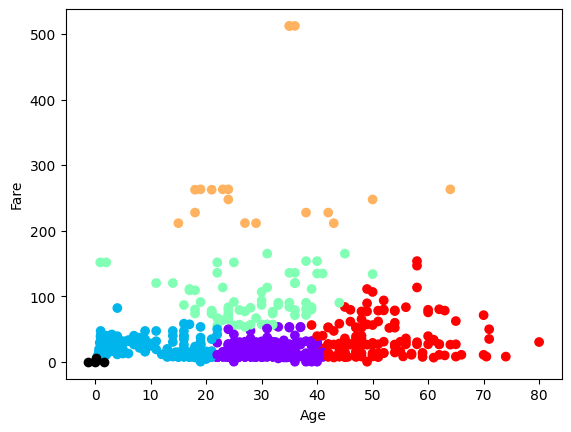

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=sns.load_dataset("titanic")
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
X=df[['age','fare']]
X.age.fillna(X.age.mean(), inplace=True)
# standardize the data
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
# create kmeans object
model=KMeans(n_clusters=5,random_state=1234) # It will make five clusters
model.fit(X_scaled)
# Assign cluster labels to the data
df['cluster']=model.labels_
plt.scatter(df.age,df.fare,c=df.cluster, cmap='rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()



In [2]:
df['cluster'].unique()

array([0, 2, 4, 1, 3])

In [3]:
pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [9]:
import plotly.express as px
fig=px.scatter_3d(df,x='age',y='fare',z='pclass',color='cluster')
fig.show()

In [10]:
fig=px.parallel_coordinates(df,color='cluster')
fig.show()

In [2]:
pip install joblib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# Saving the model
import joblib
joblib.dump(model,'kmeans_model.pkl')

['kmeans_model.pkl']

In [4]:
# load the model
model=joblib.load('kmeans_model.pkl')